In [1]:
from experiment import Experiment
from utils.behavior_data import BehaviorData
from visuals import Plotter
import torch
import numpy as np
from utils.state_data import StateData
import matplotlib.pyplot as plt


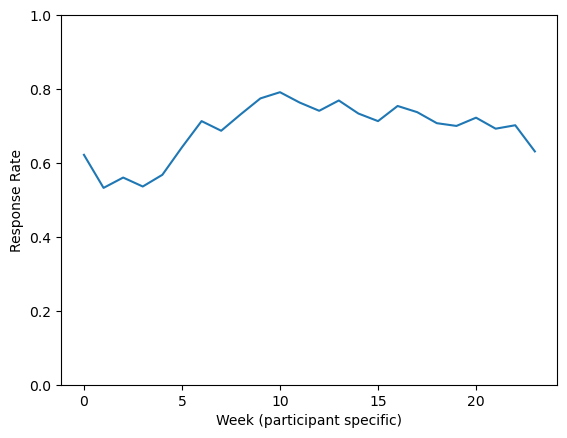

<Figure size 640x480 with 0 Axes>

In [8]:
np.random.seed(0)
torch.manual_seed(0)
bd = BehaviorData(minw=2, maxw=31, include_state=True, include_pid=False, full_questionnaire=True, expanded_states=True, full_sequence=False)

counts = bd.get_weekly_response_rates()

splot = plt.plot(counts)
plt.ylabel("Response Rate")
plt.ylim(0, 1)
plt.xlabel("Week (participant specific)")
plt.title("Weekly Response Rates")
plt.show()
plt.clf()

In [2]:
# percs = bd.counts / 56
print(bd.responseIdx)
print(bd.featureList)
print(bd.data['pid'][0])
temp = bd.data[bd.data["pid"] == 146518]
print(temp['state'][0])
print(temp['response'])
print(temp['qids'])
print(temp['pmsg_ids'])
print(temp['paction_sids'])
totalFeat = None
print(bd.chunkedFeatures[-1][0, -12:])
for feat in bd.chunkedFeatures:
    if totalFeat is None:
        totalFeat = feat.clone()
    else:
        totalFeat += feat
print(totalFeat.std(axis=0))

[0.62197393 0.53258845 0.56052142 0.53631285 0.5679702  0.6424581
 0.7132216  0.68715084 0.73184358 0.77467412 0.79143389 0.76350093
 0.74115456 0.76908752 0.73370577 0.7132216  0.75418994 0.73743017
 0.70763501 0.70018622 0.72253259 0.69273743 0.70204842 0.63128492]
64
['state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state' 'state'
 'state' 'response_last_1' 'response_last_1' 'response_last_1'
 'response_last_2' 'response_last_2' 'response_last_2' 'paction_sids_0'
 'paction_sids_0' 'paction_sids_0' 'paction_sids_0' 'paction_sids_0'
 'paction_sids

(108, 104) (428, 104)


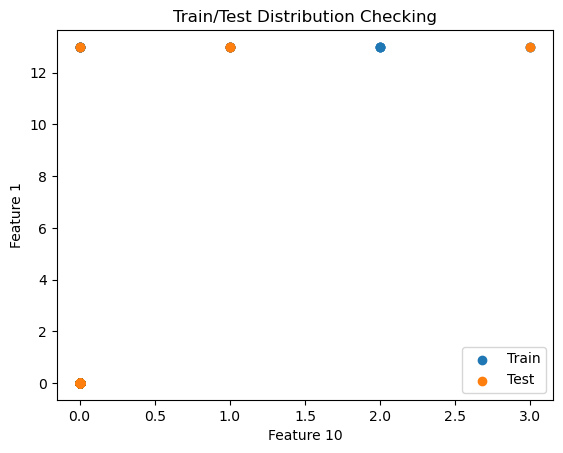

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


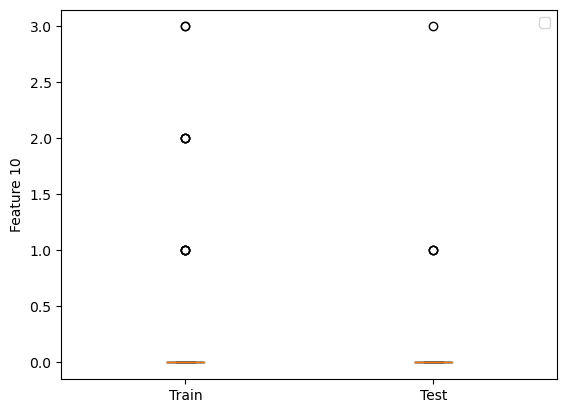

<Figure size 640x480 with 0 Axes>

In [3]:
tests = []
trains = []
for item in bd.test:
    tests.append(bd.features[item].numpy())
for item in bd.train:
    trains.append(bd.features[item].numpy())

tests = np.array(tests)
trains = np.array(trains)
print(tests.shape, trains.shape)

x, y = 10, 1
splot = plt.scatter(trains[:, x], trains[:, y], label=f"Train")
splot = plt.scatter(tests[:, x], tests[:, y], label=f"Test")
plt.title("Train/Test Distribution Checking")
plt.legend()
plt.ylabel(f"Feature {y}")
plt.xlabel(f"Feature {x}")
plt.show()
plt.savefig("simpleNotebookDistPlot.png")
plt.clf()

splot = plt.boxplot([trains[:, x], tests[:, x]], labels=["Train", "Test"])
plt.legend()
plt.ylabel(f"Feature {x}")
plt.show()
plt.savefig("simpleNotebookBoxPlot.png")
plt.clf()


In [4]:
print("Percent of participants with 0 responses:", (percs[percs == 0].count()) / len(percs))
print("Percent of participants with >0 responses:", (percs[percs != 0].count()) / len(percs))

plt.hist(percs)
plt.ylabel("No. Participants")
plt.xlabel("Response %")
plt.show()

plt.clf()
plt.ylabel("Response %")
asdf = plt.boxplot(percs)
plt.show()
print(percs.quantile([.1, .25, .53, .6, .65, .70, .75, .9]))

NameError: name 'percs' is not defined

In [ ]:
print(bd.featureList)